# Decision Trees and Random Forests: Application on feature data for A549 cell line in GREG.

Shaurya Jauhari (Email: shauryajauhari@gzhmu.edu.cn)

## Contents

* [1. Decision Trees](#link1)
    * [1.1 Package Installation and Loading Libraries](#link2)
    * [1.2 Dataset Handling](#link3)
    * [1.3 Deploying Tree Models](#link4)
        * [1.3.1 'party' Package](#link5)
            * [1.3.1.1 SMOTE Transformation](#link6)
        * [1.3.2 'rpart' Package](#link7)
* [2. Random Forests](#link8)
    * [2.1  Package Installation and Loading (randomForest)](#link9)
* [3. Session Information](#link10)


##  <a id=link1>1. Decision Trees </a>

### <a id=link2>1.1 Package Installation and Loading Libraries </a>

In [1]:
install.packages("party", dependencies = TRUE, repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/")
install.packages("rpart", dependencies = TRUE, repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/")
install.packages("rpart.plot", dependencies = TRUE, repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/")
library(party)
library(rpart)
library(rpart.plot)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



### <a id=link3>1.2 Dataset Handling </a>

In [2]:
a549greg <- read.table("A549forML.txt", header = TRUE) ## loading data
a549greg <- a549greg[, -c(1:3)] ## removing the first three columns for non-usage in the ML model.

In [3]:
head(a549greg)

,CTCF,EP300,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K9ac,H3K9me3,RAD21,RNAPol2,YY1,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0,0,0.00000000,0.00000000,0.00000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,Non-Hub
2,0,0,0.00000000,0.00000000,0.00000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,Non-Hub
3,0,0,0.00000000,0.00000000,0.00000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,Non-Hub
4,0,0,0.00000000,0.00000000,0.00000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,Non-Hub
5,0,0,0.00000000,0.00000000,0.00000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,Non-Hub
6,0,0,0.02727825,0.02613314,1.58534,0,0.03331304,1.537907,0.02891425,0.1631014,0.06050439,0.05796767,Non-Hub


In [3]:
rownames(a549greg) <- c()
a549greg$Class <- as.numeric(as.factor(a549greg$Class))-1
head(a549greg$Class)

[1] 1 1 1 1 1 1

### <a id=link4>1.3 Deploying Tree Models </a>

#### <a id=link5>1.3.1 'party' Package </a>

Let us now partition the data into training and testing subsets, as per the Pareto's dogma, i.e. maintaining 80:20 ratio for train and testing cases.

In [4]:
set.seed(3)
dataPartition <- sample(2, nrow(a549greg), replace = TRUE, prob = c(0.8,0.2))
train <- a549greg[dataPartition==1,]
test <- a549greg[dataPartition==2,]

In [9]:
cat("We have",nrow(train),"training examples and",nrow(test),"for testing.")

We have 1237967 training examples and 310325 for testing.

In [10]:
a549Tree <- ctree(Class ~ ., data= train)
print(a549Tree)


	 Conditional inference tree with 12 terminal nodes

Response:  Class 
Inputs:  CTCF, EP300, H3K27me3, H3K36me3, H3K4me1, H3K4me2, H3K4me3, H3K9ac, H3K9me3, RAD21, RNAPol2, YY1 
Number of observations:  1237967 

1) H3K4me1 <= 3.040734; criterion = 1, statistic = 180.413
  2) H3K36me3 <= 0.6794617; criterion = 1, statistic = 91.741
    3) CTCF <= 0.6574166; criterion = 1, statistic = 56.848
      4) CTCF <= 0; criterion = 1, statistic = 49.574
        5)*  weights = 135524 
      4) CTCF > 0
        6) H3K9me3 <= 1.445713; criterion = 0.999, statistic = 16.424
          7)*  weights = 474849 
        6) H3K9me3 > 1.445713
          8) H3K27me3 <= 4.037181; criterion = 0.998, statistic = 14.026
            9)*  weights = 71624 
          8) H3K27me3 > 4.037181
            10)*  weights = 1303 
    3) CTCF > 0.6574166
      11) H3K36me3 <= 0; criterion = 0.968, statistic = 9.012
        12)*  weights = 62293 
      11) H3K36me3 > 0
        13)*  weights = 59157 
  2) H3K36me3 > 0.679461

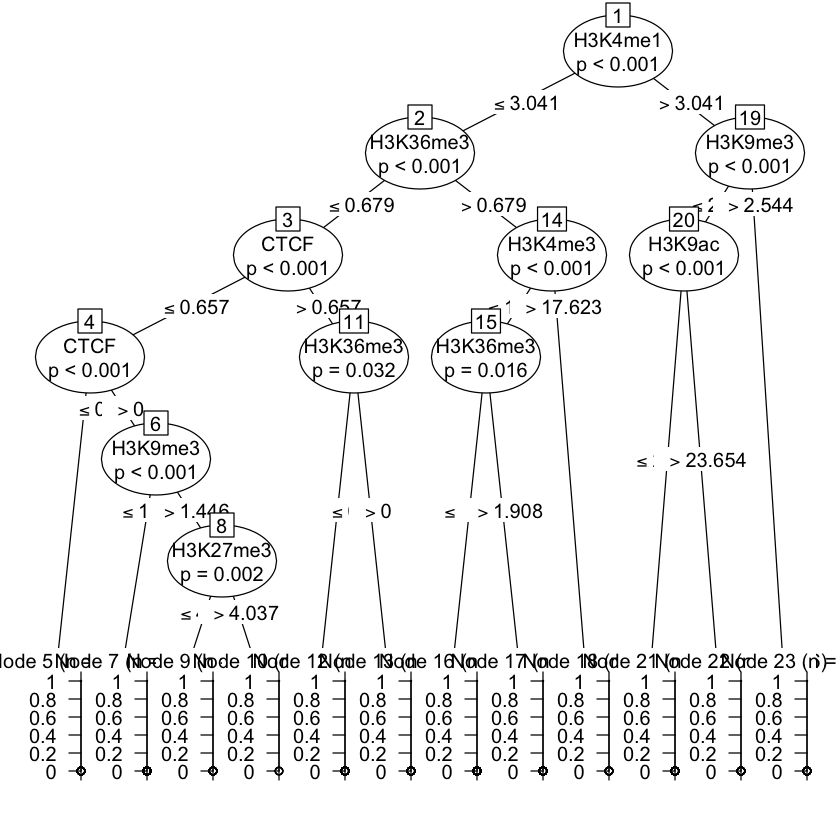

In [11]:
plot(a549Tree)

The summary says that the tree has 23 overall nodes.

In [13]:
treePred <- predict(a549Tree,test)
head(ifelse(treePred > 0.5, "Non-Hub", "Hub"))
treePred <- ifelse(treePred > 0.5, "1", "0")

Class
Non-Hub
Non-Hub
Non-Hub
Non-Hub
Non-Hub
Non-Hub


In [14]:
treePredProb <- predict(a549Tree,test, type="prob")
head(treePredProb)

[[1]]
[1] 0.9997639

[[2]]
[1] 0.9928174

[[3]]
[1] 0.9997639

[[4]]
[1] 0.9997639

[[5]]
[1] 0.9997639

[[6]]
[1] 0.9997639

In [15]:
# Misclassification Error

tab <- table(treePred, test$Class)
print(tab)

        
treePred      0      1
       1    379 309946


It can be articulated that the high skewness in data towards "Non-Hubs" outnumbering "Hubs" has engenedered a high-probability of classification for the former and "Hubs" haven't been predicted at all. 

Let us examine if the bifurcation of data into 7:3 ratio of training and testing sets makes any difference in the structure of the classification tree here.

In [18]:
set.seed(03)
dataPartition73 <- sample(2, nrow(a549greg), replace = TRUE, prob = c(0.7,0.3))
train73 <- a549greg[dataPartition73==1,]
test73 <- a549greg[dataPartition73==2,]

In [19]:
cat("We have",nrow(train73),"training examples and",nrow(test73),"for testing.")

We have 1083457 training examples and 464835 for testing.

In [20]:
a549Tree73 <- ctree(Class ~ ., data= train73)
print(a549Tree73)


	 Conditional inference tree with 15 terminal nodes

Response:  Class 
Inputs:  CTCF, EP300, H3K27me3, H3K36me3, H3K4me1, H3K4me2, H3K4me3, H3K9ac, H3K9me3, RAD21, RNAPol2, YY1 
Number of observations:  1083457 

1) H3K4me1 <= 3.040734; criterion = 1, statistic = 140.393
  2) H3K36me3 <= 0.6794617; criterion = 1, statistic = 81.023
    3) CTCF <= 0.6574166; criterion = 1, statistic = 50.685
      4) CTCF <= 0; criterion = 1, statistic = 44.23
        5)*  weights = 118568 
      4) CTCF > 0
        6) H3K9me3 <= 1.445713; criterion = 0.999, statistic = 14.983
          7)*  weights = 415692 
        6) H3K9me3 > 1.445713
          8) H3K27me3 <= 4.20085; criterion = 0.998, statistic = 13.771
            9)*  weights = 62791 
          8) H3K27me3 > 4.20085
            10)*  weights = 970 
    3) CTCF > 0.6574166
      11)*  weights = 106273 
  2) H3K36me3 > 0.6794617
    12) H3K36me3 <= 1.907719; criterion = 0.991, statistic = 11.352
      13) YY1 <= 0.7535798; criterion = 0.952, stat

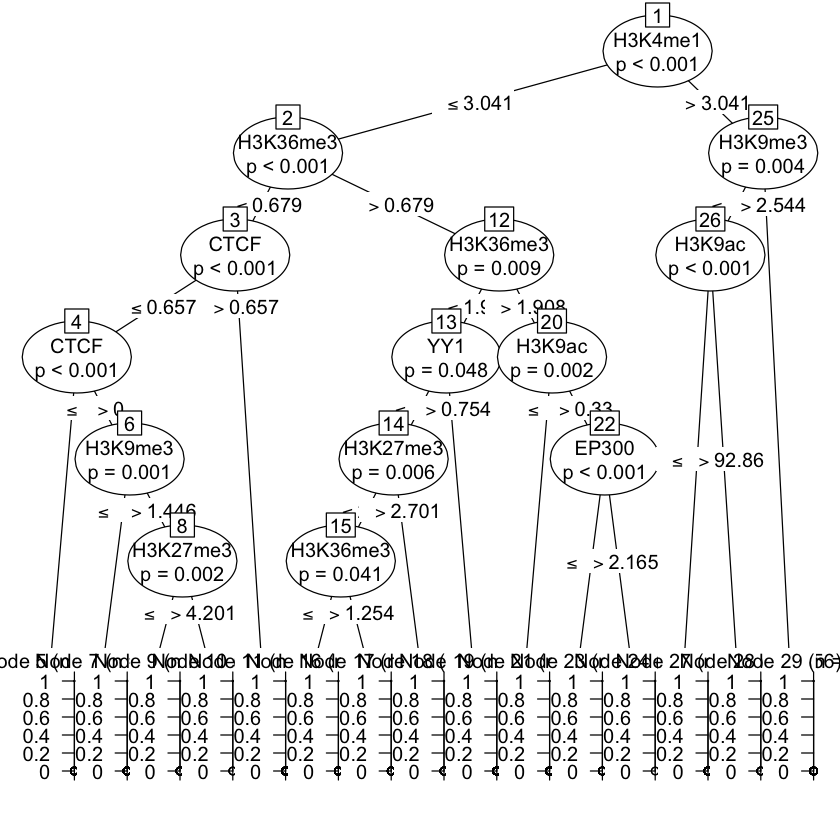

In [21]:
plot(a549Tree73)

In [30]:
treePred73 <- predict(a549Tree73, test73, type="response")
treePred73 <- ifelse(treePred73 > 0.5, "1", "0")

In [31]:
tab73 <- table(treePred73, test73$Class)
print(tab73)

          
treePred73      0      1
         1    582 464253


No luck here too. The data is highly biased, even for the modified data split. Let's resort to SMOTE transformation.

##### <a id=link6>1.3.1.1 SMOTE Transformation </a>

SMOTE transformation of the data has engendered fair model performance, in the case of logistic regression. See the pipeline [here](https://nbviewer.jupyter.org/github/shauryajauhari/transcriptionFactoriesGREG/blob/master/MachineLearning/LogisticRegressionA549GREG.ipynb).

In [5]:
install.packages("DMwR")
library(DMwR)

Loading required package: lattice

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [9]:
train$Class <- as.factor(train$Class)
set.seed(77)
smoteData <- SMOTE(Class ~., train, perc.over = 10000, k = 5, perc.under = 100)
table(smoteData$Class)


     0      1 
158469 156900 

Now that the data is seemingly balanced, let's examine the performance of the model.

In [10]:
a549SmoteTree <- ctree(Class ~ ., data= smoteData)
print(a549SmoteTree)


	 Conditional inference tree with 3299 terminal nodes

Response:  Class 
Inputs:  CTCF, EP300, H3K27me3, H3K36me3, H3K4me1, H3K4me2, H3K4me3, H3K9ac, H3K9me3, RAD21, RNAPol2, YY1 
Number of observations:  315369 

1) H3K36me3 <= 0.7055949; criterion = 1, statistic = 5972.412
  2) CTCF <= 0; criterion = 1, statistic = 1476.646
    3) H3K4me1 <= 0.1773232; criterion = 1, statistic = 82.473
      4) H3K36me3 <= 0; criterion = 1, statistic = 110.63
        5) RAD21 <= 0.02718356; criterion = 1, statistic = 96.254
          6) EP300 <= 0; criterion = 1, statistic = 115.458
            7) H3K4me1 <= 0; criterion = 1, statistic = 25.414
              8)*  weights = 15747 
            7) H3K4me1 > 0
              9)*  weights = 274 
          6) EP300 > 0
            10) EP300 <= 0.0266729; criterion = 1, statistic = 146.906
              11)*  weights = 175 
            10) EP300 > 0.0266729
              12) YY1 <= 0.007792213; criterion = 1, statistic = 31.684
                13) YY1 <= 0;

This is a relatively larger tree with 6597 nodes. Apparently, the stablization of the class distribution in the data has made the tree more comprehensive. 

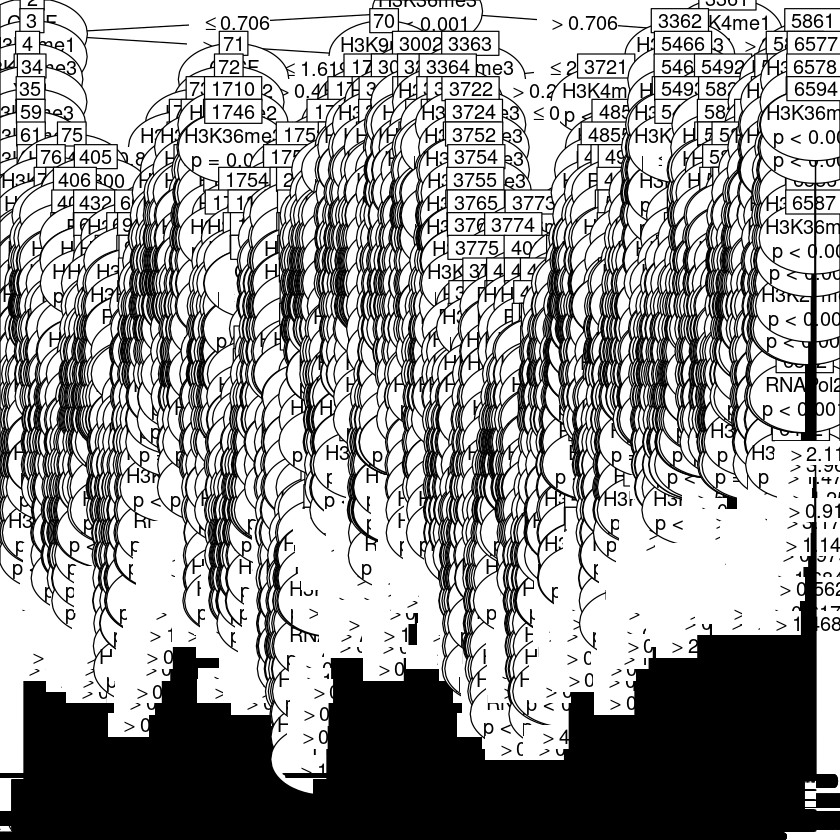

In [11]:
plot(a549SmoteTree)

Obviously, it is hard to interpret the graphic above.

In [12]:
treeSmotePred <- predict(a549SmoteTree, test)
head(treeSmotePred)

[1] 1 1 1 1 1 1
Levels: 0 1

In [13]:
tabSmote <- table(treeSmotePred, as.factor(test$Class))
print(tabSmote)

             
treeSmotePred      0      1
            0    169  58025
            1    210 251921


We can see distinct class indulgences, as opposed to the above cases of just "Non-Hub" instances.

In [14]:
install.packages(c('caret', 'e1071'))

library(caret)
library(e1071)
cat("The sensitivity of the model is", (sensitivity(tabSmote))*100, "%")

Loading required package: ggplot2



The sensitivity of the model is 44.59103 %

In [15]:
cat("The specificity of the model is", (specificity(tabSmote))*100, "%")

The specificity of the model is 81.279 %

In [21]:
head(treeSmotePred)

[1] 1 1 1 1 1 1
Levels: 0 1

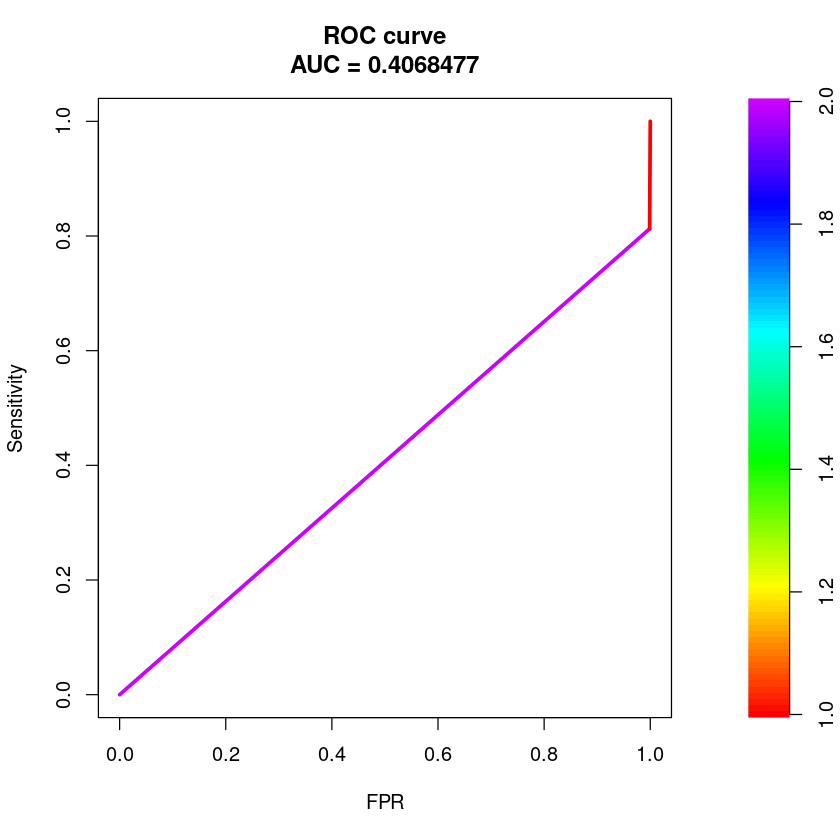

In [22]:
install.packages("PRROC", dependencies= TRUE)
library(PRROC)

rocPlot <- roc.curve(treeSmotePred, as.factor(test$Class), curve=TRUE)
plot(rocPlot)

In [26]:
accur <- 1 - sum(diag(tabSmote))/sum(tabSmote)
cat("The accuracy of the model is",accur*100,"%")

The accuracy of the model is 18.76581 %

The AUC and accuracy are pretty darn bleak. Maybe, we should explore other options.

Addtionally, the function ctree() offers flexibility in terms of defining parameters for classification via ctree_control() function. Look for attributes *mincriterion* and *minsplit*. The former denotes the confidence level (i.e. 1- probability value), while the latter signifies the minimum number of samples required for splitting a tree branch into two. The default values are 0.95 and 20 respectively. Let us examine if any alteration makes a difference.They can be accessed via *controls*, i.e. ctree(formula,data,controls=ctree_control(mincriterion= , minsplit= ).


In [28]:
a549SmoteTreeAlt <- ctree(Class ~ ., data= smoteData, controls=ctree_control(mincriterion = .99, minsplit= 10))
print(a549SmoteTreeAlt)


	 Conditional inference tree with 2667 terminal nodes

Response:  Class 
Inputs:  CTCF, EP300, H3K27me3, H3K36me3, H3K4me1, H3K4me2, H3K4me3, H3K9ac, H3K9me3, RAD21, RNAPol2, YY1 
Number of observations:  315369 

1) H3K36me3 <= 0.7055949; criterion = 1, statistic = 5972.412
  2) CTCF <= 0; criterion = 1, statistic = 1476.646
    3) H3K4me1 <= 0.1773232; criterion = 1, statistic = 82.473
      4) H3K36me3 <= 0; criterion = 1, statistic = 110.63
        5) RAD21 <= 0.02718356; criterion = 1, statistic = 96.254
          6) EP300 <= 0; criterion = 1, statistic = 115.458
            7) H3K4me1 <= 0; criterion = 1, statistic = 25.414
              8)*  weights = 15747 
            7) H3K4me1 > 0
              9)*  weights = 274 
          6) EP300 > 0
            10) EP300 <= 0.0266729; criterion = 1, statistic = 146.906
              11)*  weights = 175 
            10) EP300 > 0.0266729
              12) YY1 <= 0.007792213; criterion = 1, statistic = 31.684
                13) YY1 <= 0;

This tree has relatively lesser number of nodes as more stringent criteria have been imposed. Let us work out the performance metrics for this classification model for the test data.

In [30]:
treeSmotePredAlt <- predict(a549SmoteTreeAlt, test)
tabSmoteAlt <- table(treeSmotePredAlt, as.factor(test$Class))
print(tabSmoteAlt)

                
treeSmotePredAlt      0      1
               0    172  62134
               1    207 247812


In [33]:
accur <- 1 - sum(diag(tabSmoteAlt))/sum(tabSmoteAlt)
cat("The accuracy of the model is",accur*100,"%")

The accuracy of the model is 20.08894 %

In [31]:
cat("The sensitivity of the model is", (sensitivity(tabSmoteAlt))*100, "%")

The sensitivity of the model is 45.38259 %

In [32]:
cat("The specificity of the model is", (specificity(tabSmote))*100, "%")

The specificity of the model is 81.279 %

We are assuming "Hub" as a demarcation for the positive class, and so sensitivity of the model being still lower than the specificity establishes that the model is more comprehensible for the "Non-Hub" (negative class). This can again be attributed to the share of data for the respective classes. Ideally, both values be as high in magnitude, is reminiscent of a good model.  

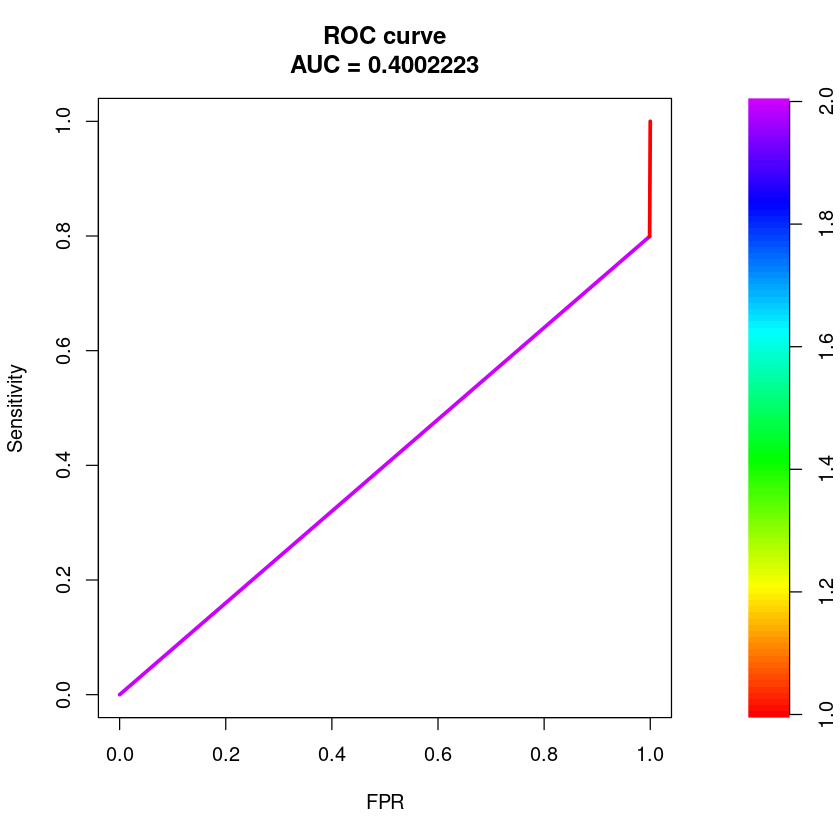

In [34]:
rocPlot <- roc.curve(treeSmotePredAlt, as.factor(test$Class), curve=TRUE)
plot(rocPlot)

This model is slightly better in terms of accuracy than the previous model, but the AUC has shrunk infinitesimally.

#### <a id=link7>1.3.2 'rpart' Package </a>

Using another package, we shall continue to work on the SMOTE transformed training data to model the classifier.

In [37]:
a549TreeAlt <- rpart(Class ~ ., data = smoteData)
print(a549TreeAlt)

n= 315369 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

   1) root 315369 156900 0 (0.5024876 0.4975124)  
     2) RNAPol2>=3.49218e-06 258851 110079 0 (0.5747399 0.4252601)  
       4) RNAPol2< 0.06049805 10120      0 0 (1.0000000 0.0000000) *
       5) RNAPol2>=0.06049805 248731 110079 0 (0.5574376 0.4425624)  
        10) RNAPol2>=0.06050773 215253  84509 0 (0.6073969 0.3926031)  
          20) RNAPol2< 0.1210078 17215      0 0 (1.0000000 0.0000000) *
          21) RNAPol2>=0.1210078 198038  84509 0 (0.5732688 0.4267312)  
            42) RNAPol2>=0.1210091 173059  64803 0 (0.6255439 0.3744561)  
              84) RNAPol2< 0.1815124 15619      0 0 (1.0000000 0.0000000) *
              85) RNAPol2>=0.1815124 157440  64803 0 (0.5883956 0.4116044)  
               170) RNAPol2>=0.1815133 139176  51005 0 (0.6335216 0.3664784)  
                 340) RNAPol2< 0.2420172 12614      0 0 (1.0000000 0.0000000) *
                 341) RNAPol2>=0.2420172 126562  51005 0 

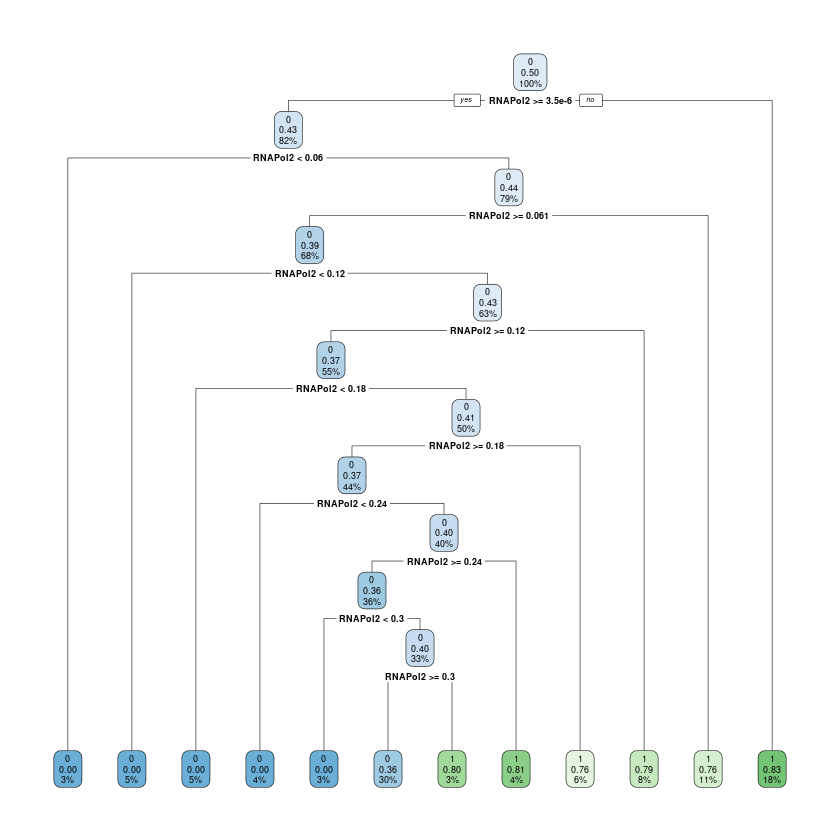

In [38]:
rpart.plot(a549TreeAlt)

We can see that the tree is hinged over the **RNAPol2** variable which innately signifies [it's] importance; also from the prespective of the **Transcription Factories**.

There is a complete contrast between the two trees drawn from *ctree()* and *rpart()* functions. The *ctree* uses a significance test procedure in order to select variables instead of selecting the variable that maximizes an information measure (e.g. Gini coefficient). Basically the methodology of both approaches is different; *rpart* is a CART algorithm, while *party* is a CHAID algorithm. (http://www.bzst.com/2006/10/classification-trees-cart-vs-chaid.html).

Next, we move to the more fuller concept, of Random Forests.

##  <a id=link8>2. Random Forests </a>

Decision trees are accomodated inside Random Forests. This ensemble brings about variety in data classification and hence more robustness. This notion also helps in avoidance of overfitting. Random forests can deal with large number of features and selects them for constructing trees on the basis of importance. As we will see, they are easy to implement and have two free parameters to tune- (i) *ntree* signifying the number of trees (where default value is 500), and (ii) *mtry* denoting variables randomly selected for each split (default here sq(p) when classification is sought, and (p/3) when regression; p is the total number of features in the dataset) 

###  <a id=link9>2.1 Package Installation and Loading (randomForest) </a>

In [40]:
install.packages("randomForest", dependencies = TRUE, repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/")
install.packages("caret", dependencies = TRUE, repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/")
library(randomForest)
library(caret)

Installing package into ‘/home/shaurya/R/x86_64-redhat-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/shaurya/R/x86_64-redhat-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘R.cache’, ‘forcats’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘haven’, ‘brglm’, ‘lme4’, ‘qvcalc’, ‘combinat’, ‘questionr’, ‘ISwR’, ‘corpcor’, ‘BradleyTerry2’, ‘fastICA’, ‘gam’, ‘kernlab’, ‘klaR’, ‘ellipse’, ‘mda’, ‘MLmetrics’, ‘pls’, ‘proxy’, ‘RANN’, ‘spls’, ‘subselect’, ‘pamr’, ‘superpc’, ‘Cubist’


Warning message in install.packages("caret", dependencies = TRUE, repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("caret", dependencies = TRUE, repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/"):
“installation of package ‘lme4’ had non-zero exit status

There are basically three steps involved in construction of a Random Forest:
    1. Draw *ntree* bootstrap samples.
    2. For each bootstrap sample, grow a un-pruned tree by choosing best split based on a random sample of *mtry* predictors at each node.
    3. Predict new data using majority votes for classification, and average for regression based on *ntree* trees.

For application, we shall consider a subset of the data we used for decision trees. The random forests algorithm tend to consume greater in terms of computational resources.

Moving away from the Pareto's principle, let us work with 70:30 split for training and testing data.

In [78]:
## Let us work with a fraction (10%) of data. The algorithm, given the computational resources, fails in execution for the whole data. 

set.seed(8)
a549gregSample <- a549greg[sample(nrow(a549greg), replace=T, size=0.1*nrow(a549greg)),]
dataPartition73 <- sample(2, nrow(a549gregSample), replace = TRUE, prob = c(0.7,0.3))
train73 <- a549gregSample[dataPartition==1,]
test73 <- a549gregSample[dataPartition==2,]

Again, the data being biased towards the negative classes, that far outnumber the instances with positive class, we shall transform the data towards being relatively heterogeneous.

In [79]:
install.packages("ROSE", dependencies=TRUE)
library(ROSE)
bothTrain <- ovun.sample(Class ~., data = train73, method = "both", p =0.5, seed = 11)$data
table(bothTrain$Class)


    1     0 
61850 62091 

We have regulated the data points on near equal distribution of classes. Let us train the classifier on this data.

In [81]:
# Execute random forest algorithm

a549rf <- randomForest(formula = Class ~ ., 
                    data = bothTrain,
                   proximity = FALSE,
                   ntree = 500)
print(a549rf)


Call:
 randomForest(formula = Class ~ ., data = bothTrain, proximity = FALSE,      ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 2.53%
Confusion matrix:
      1     0 class.error
1 59901  1949  0.03151172
0  1188 60903  0.01913321


In [82]:
# Prediction and Confusion Matrix

a549PredRF <- predict(a549rf,test73)
confusionMatrix(a549PredRF, test73$Class)

Warning message in confusionMatrix.default(a549PredRF, test73$Class):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0    10   945
         1    25 29908
                                          
               Accuracy : 0.9686          
                 95% CI : (0.9666, 0.9705)
    No Information Rate : 0.9989          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0181          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.2857143       
            Specificity : 0.9693709       
         Pos Pred Value : 0.0104712       
         Neg Pred Value : 0.9991648       
             Prevalence : 0.0011331       
         Detection Rate : 0.0003238       
   Detection Prevalence : 0.0309182       
      Balanced Accuracy : 0.6275426       
                                          
       'Positive' Class : 0               
                  

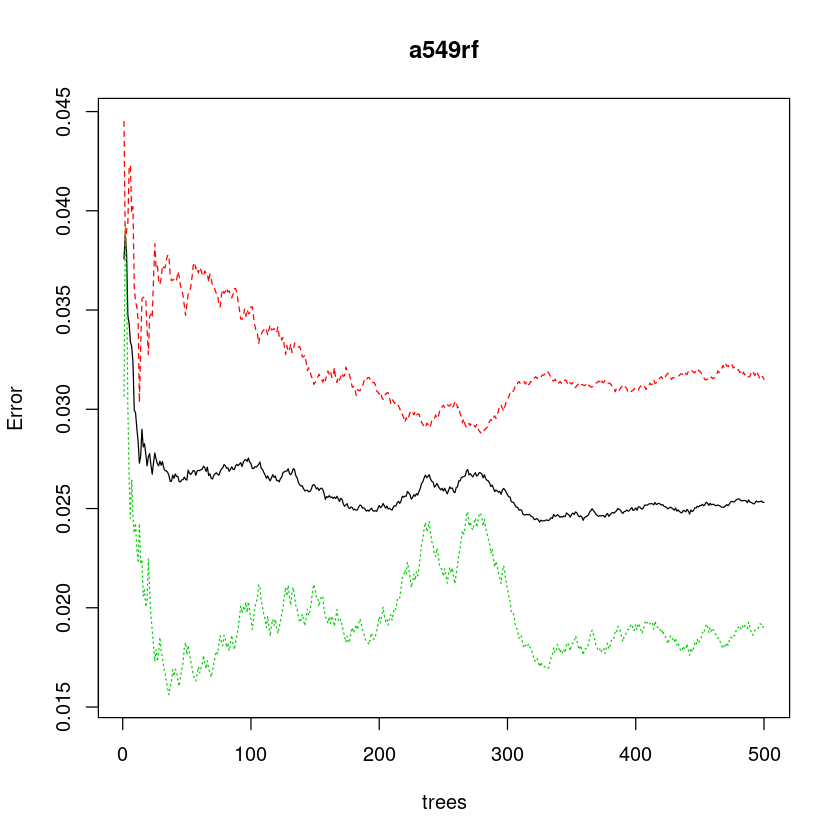

In [83]:
# Error rates (MSEs) of the Random Forest

plot(a549rf)

The above plot shows that the error rate stablises after ~350 trees and any number of trees beyond doesn't bring any betterment to the error. In view of the same, we shall tune the paramaters of our forest to reduce the number of trees from 500 (default) to 350. Let us observe the change in results. This step helps ascertain an optimal value for *ntree*. 

In [84]:
head(bothTrain)

,CTCF,EP300,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K9ac,H3K9me3,RAD21,RNAPol2,YY1,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.0956944,2.0852906,0.3273390,2.9007789,7.770764,2.76436221,2.0320957,2.0871594,3.2094821,1.4950960,1.2705923,2.3187070,1
2,0.3067944,0.9357073,0.1091130,1.1759915,0.000000,0.07573595,0.1998783,0.0000000,0.7517706,0.5164877,0.6655483,0.6956121,1
3,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.00000000,0.0000000,0.1464673,0.0000000,0.0000000,0.0000000,0.0000000,1
4,0.4382778,1.1228488,0.7092345,0.9669263,0.000000,1.70405889,0.9993913,0.0000000,0.0000000,1.0329754,0.1815132,0.9564666,1
5,1.0518666,0.8287694,2.9187727,0.6533286,0.000000,0.94669939,0.4663826,0.0000000,0.0000000,0.7339562,0.1210088,0.7825636,1
6,0.6135889,0.8555038,1.6639732,0.9930595,1.299459,0.26507583,0.5996348,0.6957198,4.3660522,1.1960768,0.4235308,0.9564666,1


mtry = 3  OOB error = 2.51% 
Searching left ...
mtry = 2 	OOB error = 3.46% 
-0.3809524 0.005 
Searching right ...
mtry = 6 	OOB error = 1.53% 
0.3893179 0.005 
mtry = 12 	OOB error = 1.41% 
0.08219178 0.005 


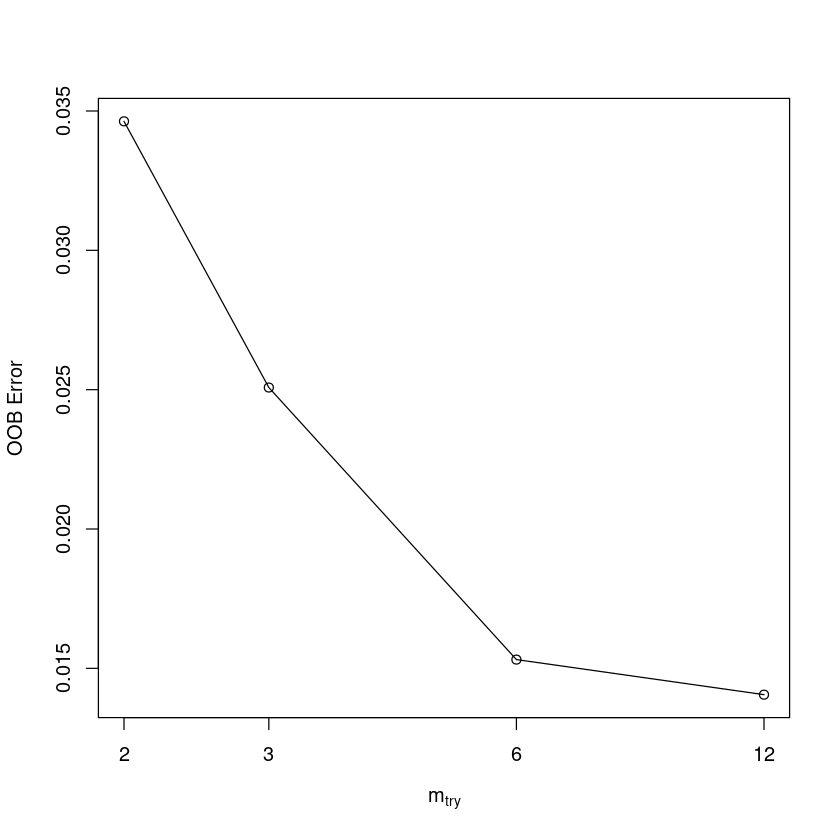

In [85]:
# Tuning mtry

t2 <- tuneRF(bothTrain[,-13], bothTrain[,13],
            stepFactor = 2,
            plot = TRUE,
            ntreeTry = 350,
            trace = TRUE,
            improve = 0.005)               

Let us increase the step factor value and try again.

mtry = 3  OOB error = 2.54% 
Searching left ...
mtry = 1 	OOB error = 5.04% 
-0.9809584 0.005 
Searching right ...
mtry = 12 	OOB error = 1.4% 
0.4477944 0.005 


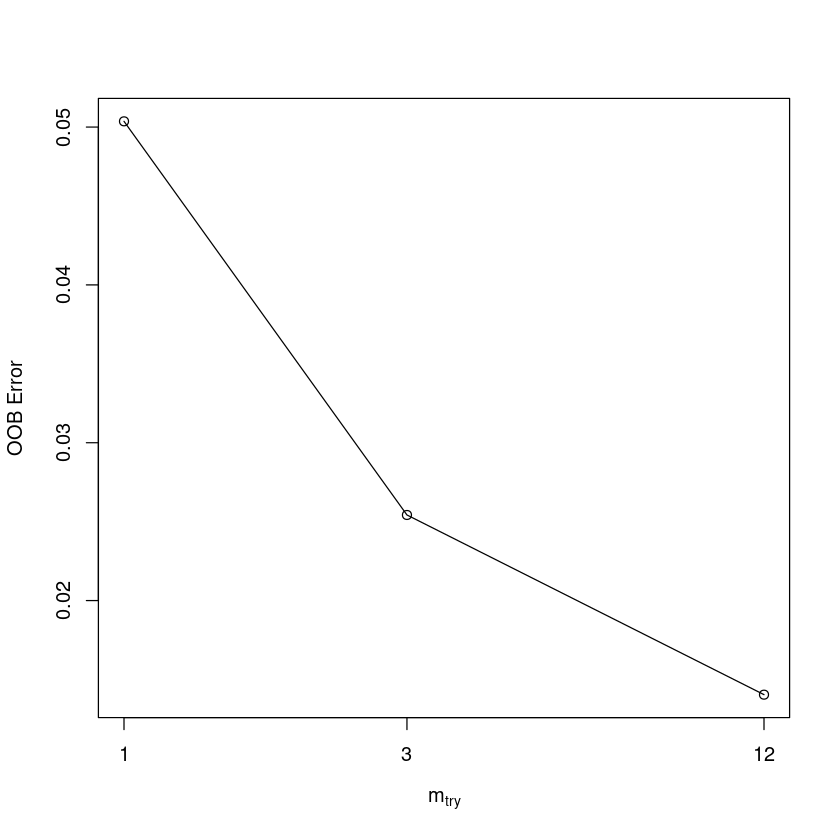

In [86]:
# Tuning with stepfactor = 5

t5 <- tuneRF(bothTrain[,-13], bothTrain[,13],
            stepFactor = 5,
            plot = TRUE,
            ntreeTry = 350,
            trace = TRUE,
            improve = 0.005)      

mtry = 3  OOB error = 2.72% 
Searching left ...
mtry = 1 	OOB error = 4.8% 
-0.7666963 0.005 
Searching right ...
mtry = 12 	OOB error = 1.4% 
0.4835263 0.005 


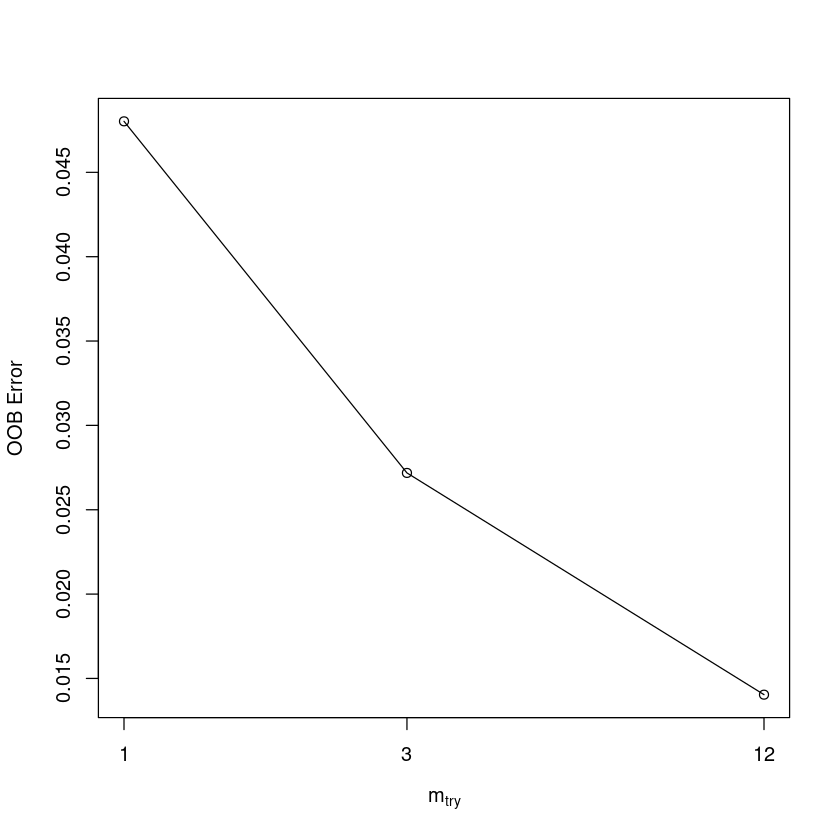

In [87]:
# Tuning with stepfactor = 4

t4 <- tuneRF(bothTrain[,-13], bothTrain[,13],
            stepFactor = 4,
            plot = TRUE,
            ntreeTry = 350,
            trace = TRUE,
            improve = 0.005)    

Thus, we see that with *stepfactor = 5,4* no new values of mtry emerge.

We observe that OOB error stablises on assuming the random sample size of 12. This is the optimal value for *mtry* parameter. With the modified values of *mtry* and *ntree*, let us attempt our new Random Forest model. It will hopefully be an improved one.

In [88]:
a549rfOpt <- randomForest(Class~.,
                    data = bothTrain,
                    ntree=350,
                    mtry=12,
                    importance= TRUE,
                    proximity = FALSE)
print(a549rfOpt)     


Call:
 randomForest(formula = Class ~ ., data = bothTrain, ntree = 350,      mtry = 12, importance = TRUE, proximity = FALSE) 
               Type of random forest: classification
                     Number of trees: 350
No. of variables tried at each split: 12

        OOB estimate of  error rate: 1.41%
Confusion matrix:
      1     0 class.error
1 61026   824  0.01332255
0   918 61173  0.01478475


This is way better than the previous one, with improved accuracy as depicted below.

In [89]:
a549PredRFOpt <- predict(a549rfOpt,test73)
confusionMatrix(a549PredRFOpt, test73$Class)

Warning message in confusionMatrix.default(a549PredRFOpt, test73$Class):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0     7   415
         1    28 30438
                                         
               Accuracy : 0.9857         
                 95% CI : (0.9843, 0.987)
    No Information Rate : 0.9989         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.0286         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.2000000      
            Specificity : 0.9865491      
         Pos Pred Value : 0.0165877      
         Neg Pred Value : 0.9990809      
             Prevalence : 0.0011331      
         Detection Rate : 0.0002266      
   Detection Prevalence : 0.0136623      
      Balanced Accuracy : 0.5932746      
                                         
       'Positive' Class : 0              
                                      

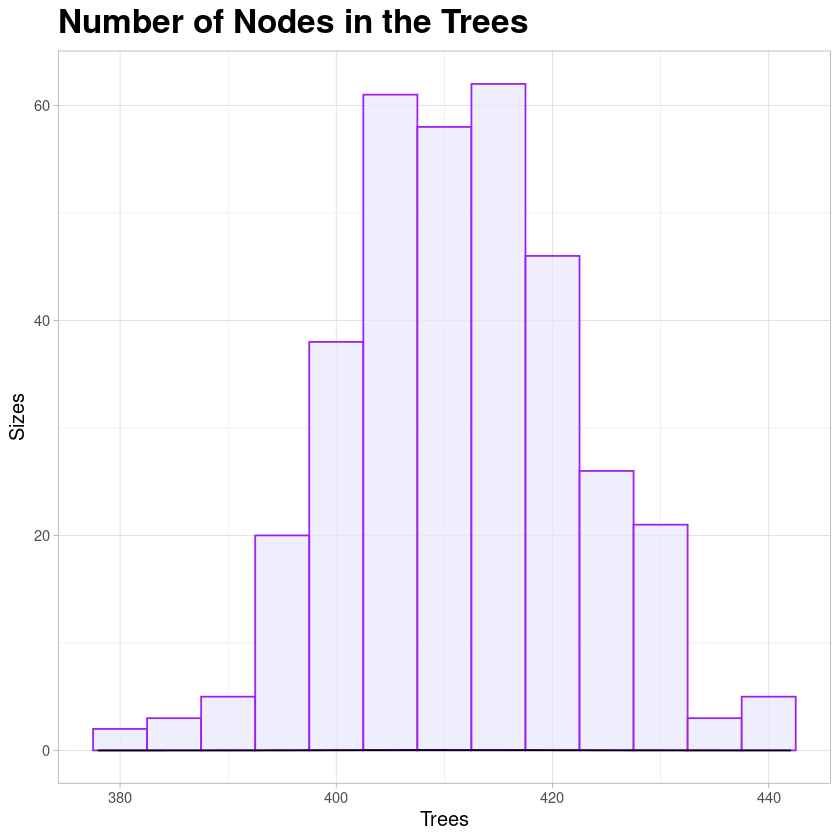

In [90]:
# Number of nodes for the trees
library(ggplot2)
ts <- as.data.frame(treesize(a549rfOpt), row.names = c())
ggplot(data = ts, aes(x = `treesize(a549rfOpt)`)) + 
  geom_histogram(binwidth = 5, color="purple", fill="lavender", position="identity", alpha=0.7)+
  labs(x="Trees", y="Sizes")+
  ggtitle("Number of Nodes in the Trees")+
  geom_density(alpha=0.6)+
  theme_light()+
  theme(plot.title= element_text(size = 20, face = "bold"),
        axis.title = element_text(size = 12))

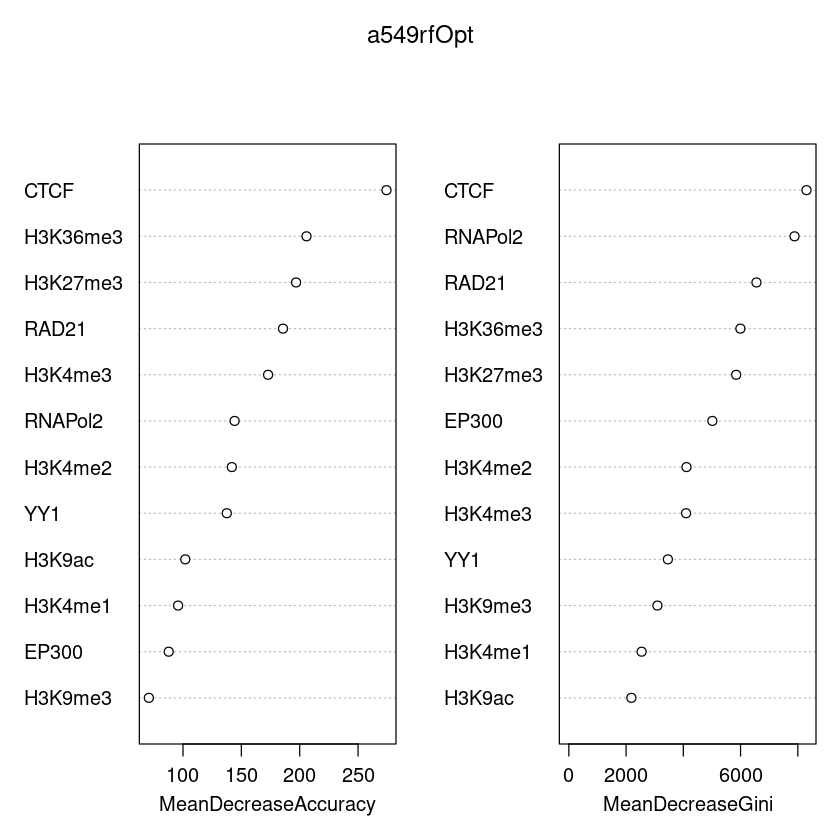

In [91]:
# Variable Importance

varImpPlot(a549rfOpt)

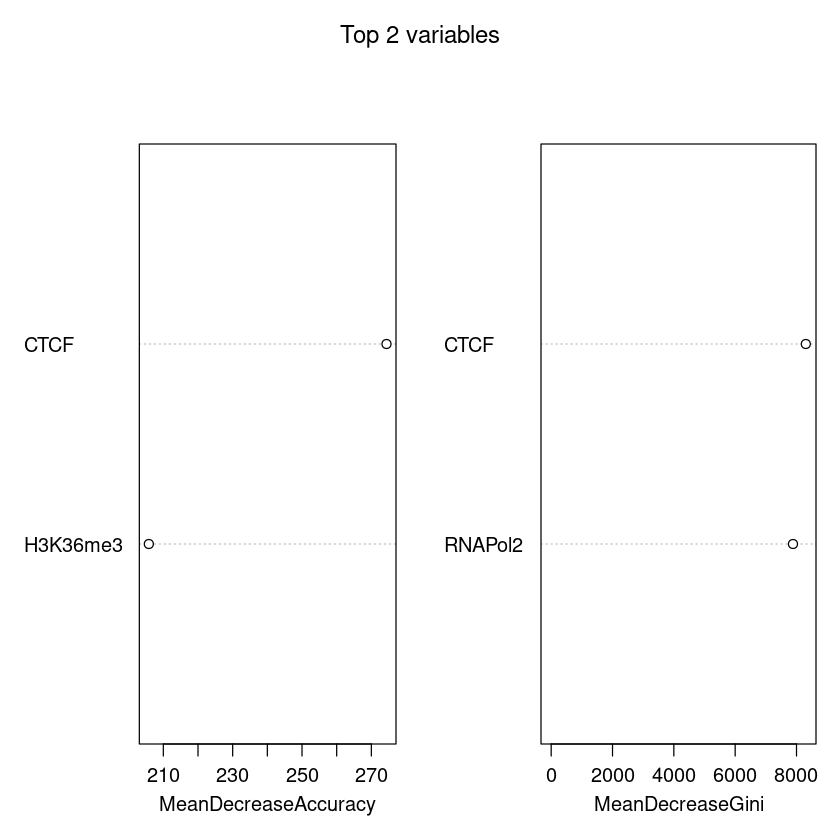

In [92]:
varImpPlot(a549rfOpt , sort = TRUE, n.var = 2, main = "Top 2 variables")

In [93]:
importance(a549rfOpt)

,1,0,MeanDecreaseAccuracy,MeanDecreaseGini
CTCF,125.690921,270.24363,274.36683,8303.834
EP300,-28.368293,86.88660,87.77393,5014.093
H3K27me3,-70.500628,198.77934,196.89972,5847.535
H3K36me3,-21.506371,199.27688,205.82274,5993.713
H3K4me1,-6.241261,93.91318,95.78123,2543.045
H3K4me2,17.123431,164.35430,141.87058,4110.703
H3K4me3,-67.622852,173.59734,172.91563,4096.402
H3K9ac,-1.324176,102.71160,101.94483,2185.048
H3K9me3,-19.443150,71.51239,70.74069,3094.736
RAD21,-20.488342,188.29111,185.68005,6555.697


In [94]:
varUsed(a549rfOpt)

[1] 20384 11515 13660 12642  6134 11572 13898  4169  7991 14615 16042 11119

This classification model of random forests projects **CTCF** as the most crucial variable with maximum instances used while contruction of trees. It is studied to be a key mediator in [chromatin colocalization](https://science.sciencemag.org/content/312/5771/269.full).

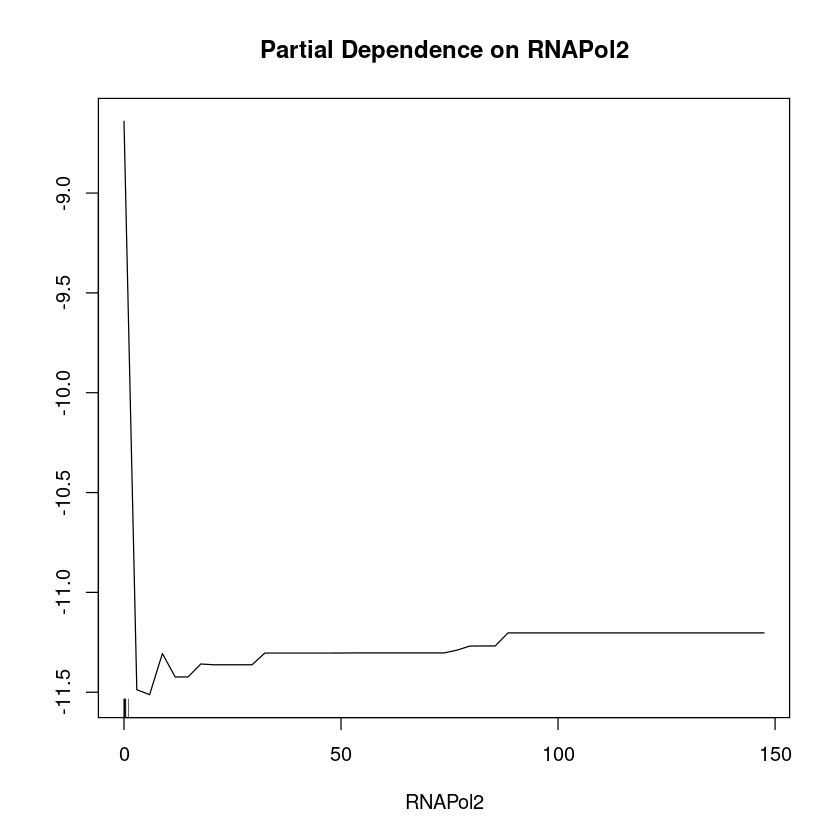

In [95]:
# Partial Dependence Plots

partialPlot(a549rfOpt, bothTrain, RNAPol2 , "0")

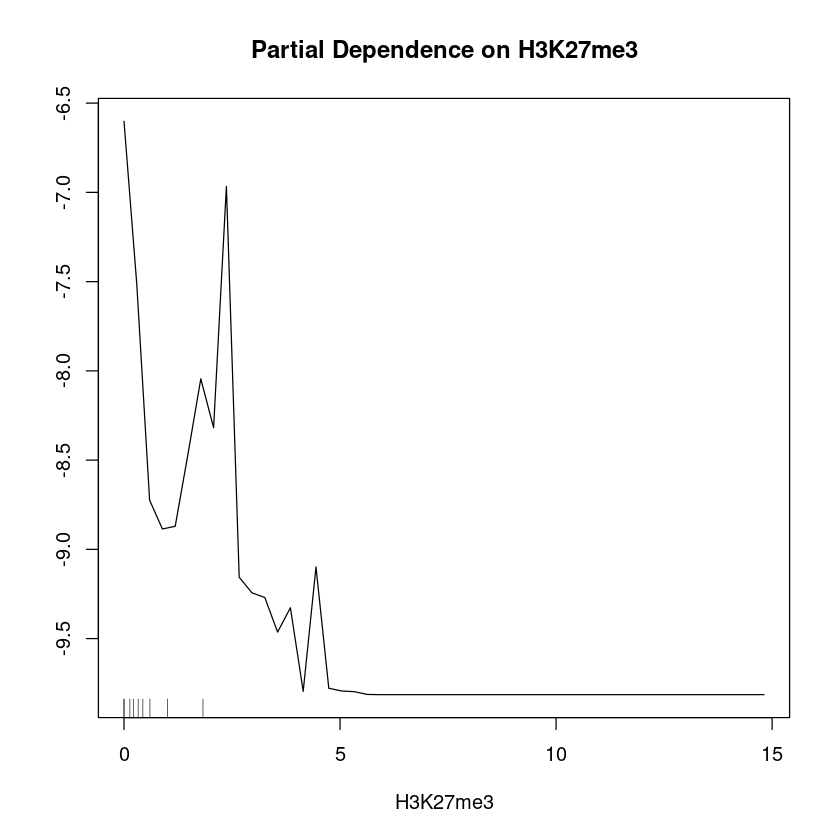

In [96]:
partialPlot(a549rfOpt, bothTrain, H3K27me3, "0")

The partial dependence plot represents a variable's contribution to the probability of class depiction (classification). The variable contribution of H3K27me3 is pretty sluggish and imprecise. Contrarily, as seen below, CTCF has more determinism in the model.

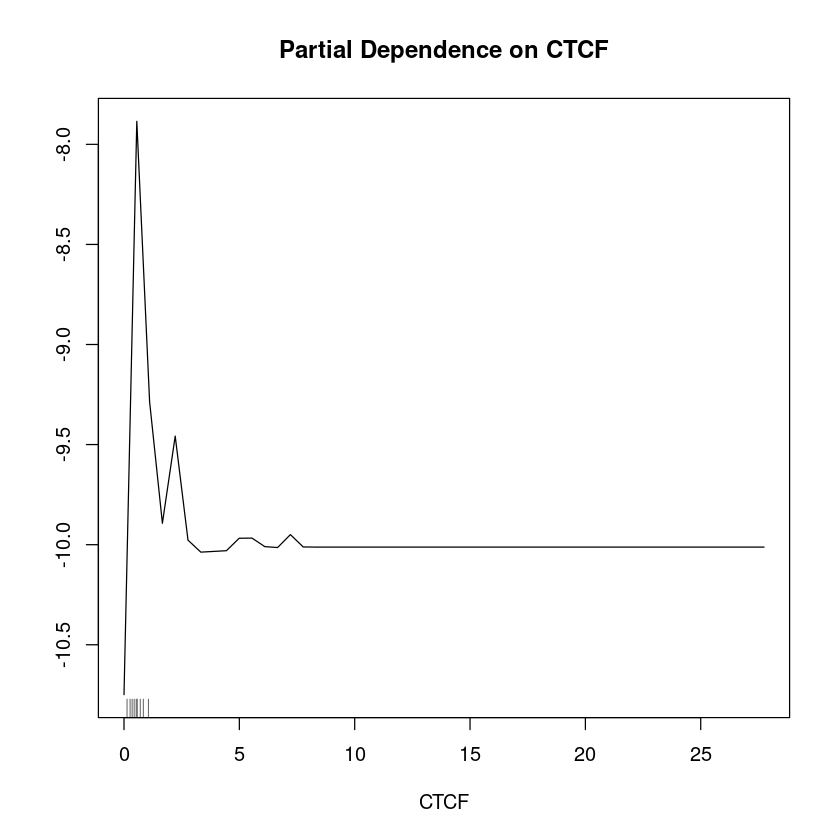

In [97]:
partialPlot(a549rfOpt, bothTrain, CTCF, "0")

##  <a id=link10>3. Session Information </a>

In [99]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ROSE_0.0-3          randomForest_4.6-14 ROCR_1.0-11        
 [4] PRROC_1.3.1         e1071_1.7-3         caret_6.0-86       
 [7] ggplot2_3.3.2       DMwR_0.4.1          lattice_0.20-41    
[10] rpart.plot_3.0.8    rpart_4.1-15        party_1.3-5        
[13] strucchange_1.5-2   sandwich_2.5-1      zoo_1.